<a href="https://colab.research.google.com/github/MelG76/Datasets/blob/main/IA_Actividad2_Melania.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ACTIVIDAD 1** 


---



**TÉCNICAS DE INTELIGENCIA ARTIFICIAL - UNIR**

> Melania Galarza (Mayo'21)


---


**INTRODUCCIÓN**

El ejercicio consiste en el tratamiento de un dataset proporcionado se deberá analizar e interpretar, tratar en caso de ser necesario, y construir xxx

### **PASO 0. LIBRERÍAS Y DATASET**

Para poder dar comienzo a la actividad deberemos garantizar que las librerías que van a ser precisas están importadas y sus objetos disponibles.

Además, incluiremos en este paso 0 la carga de nuesta fuente de datos, proporcionada en csv (que deberá estar en la misma ubicación que este Notebook), en un dataset que será en núcleo de nuestra actividad.

1. Importa librerías y Objetos

In [39]:
#Librerías para algoritmos de modelado
from sklearn import datasets
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier  # para el modelo Clasificación arbol de decisión CART / C4.5
from sklearn.ensemble import RandomForestClassifier #para el modelo Clasificación random forest regresor de clasificación
from sklearn.neighbors import KNeighborsClassifier #Clasificación
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
#pip install xgboost
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier

import math
import keras
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential, Model
from keras.layers import Activation, Dense, Dropout, Input
#from keras.utils import plot_model

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.metrics import plot_confusion_matrix
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

#Librerías para operaciones axiliares y tratamiento de dataset
from pandas import read_csv
import numpy as np
import pandas as ps

#Librerías precisas para los gráficos matplotlib & seaborn
import matplotlib.pyplot as plt
from matplotlib import pyplot
from matplotlib import style
import matplotlib.ticker as ticker
import seaborn as sns
from pandas.plotting import scatter_matrix
import pydotplus
import matplotlib.image as pltimg
import matplotlib.pyplot as plt

%matplotlib inline 
#para que todos los gráficos salgan debajo de la celda

2. Carga de los dataset precisos para el ejercio.

  Lo descargamos de la url 

In [67]:
#DATASET PARA EL EJERCICIO DE REGRESIÓN
#indico cual es el fichero con el que crear el dataset, el fichero deberá estar en la ruta de ejecución del notebook
#fic='https://github.com/MelG76/Datasets/blob/main/insurance.csv'

fic='insurance.csv'
dataset = ps.read_csv(fic, sep=',')
#Visualizamos la forma que tiene nuestro dataset y el número de observaciones disponibles
dataset.shape

(1338, 7)

In [4]:
#DATASET PARA EL EJERCICIO DE CLASIFICACIÓN
fic_Clasificacion='https://drive.google.com/file/d/1ddwXadi9m_pG49gUtoO-KYUhtiEvhq2S/view?usp=sharing/winequality-red.csv'
fic_Clasificacion='winequality-red.csv'
dataset_Clas= read_csv(fic_Clasificacion, ',')
dataset_Clas.shape

(1599, 12)

### **EJERCICIO 2 - CLASIFICACIÓN.**

Exploración descriptiva de los datos previa a la generación de los modelos. 

Este paso preliminar nos permitirá entener la información disponible en el conjunto de datos, qué son y de qué tipo; comprender qué contiene cada variable, identificar la clase y detectar errores. 


In [27]:
#Analizamos con un head & tail los nombres de las columnas y una muestra de valores de nuestro dataset 
#del principio y del final de los registros
print(dataset_Clas.head(10))
print (dataset_Clas.tail(10))

   fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0            7.4              0.70         0.00  ...       0.56      9.4        5
1            7.8              0.88         0.00  ...       0.68      9.8        5
2            7.8              0.76         0.04  ...       0.65      9.8        5
3           11.2              0.28         0.56  ...       0.58      9.8        6
4            7.4              0.70         0.00  ...       0.56      9.4        5
5            7.4              0.66         0.00  ...       0.56      9.4        5
6            7.9              0.60         0.06  ...       0.46      9.4        5
7            7.3              0.65         0.00  ...       0.47     10.0        7
8            7.8              0.58         0.02  ...       0.57      9.5        7
9            7.5              0.50         0.36  ...       0.80     10.5        5

[10 rows x 12 columns]
      fixed acidity  volatile acidity  citric acid  ...  sulphates  alcoho

In [28]:
#Comprobamos el tipo de datos contenido en cada atributo del dataset, numero de obs y valores nulos 
dataset_Clas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [29]:
#Analizamos valores nulos
print('** A - Atributos y valores nulos **')
print('')
print(dataset_Clas.isnull().sum())

#Analizamos Total de valores por atributo
print('')
print('** B - Atributos y número de instancias disponibles **')
print('')
print(dataset_Clas.notnull().sum())

** A - Atributos y valores nulos **

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

** B - Atributos y número de instancias disponibles **

fixed acidity           1599
volatile acidity        1599
citric acid             1599
residual sugar          1599
chlorides               1599
free sulfur dioxide     1599
total sulfur dioxide    1599
density                 1599
pH                      1599
sulphates               1599
alcohol                 1599
quality                 1599
dtype: int64


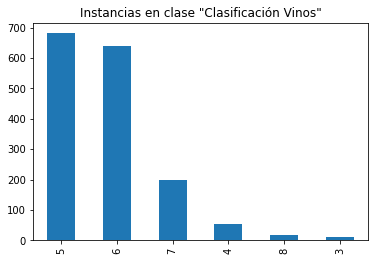

In [30]:
#valores de la clase
# gráfico de barras de frecuencias relativas del valor de la clase

plot = (dataset_Clas['quality'].value_counts()).plot(kind='bar', title='Instancias en clase "Clasificación Vinos"')

In [31]:
#Veamos la descripción de las variables de nuestro dataset
dataset_Clas.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/lo

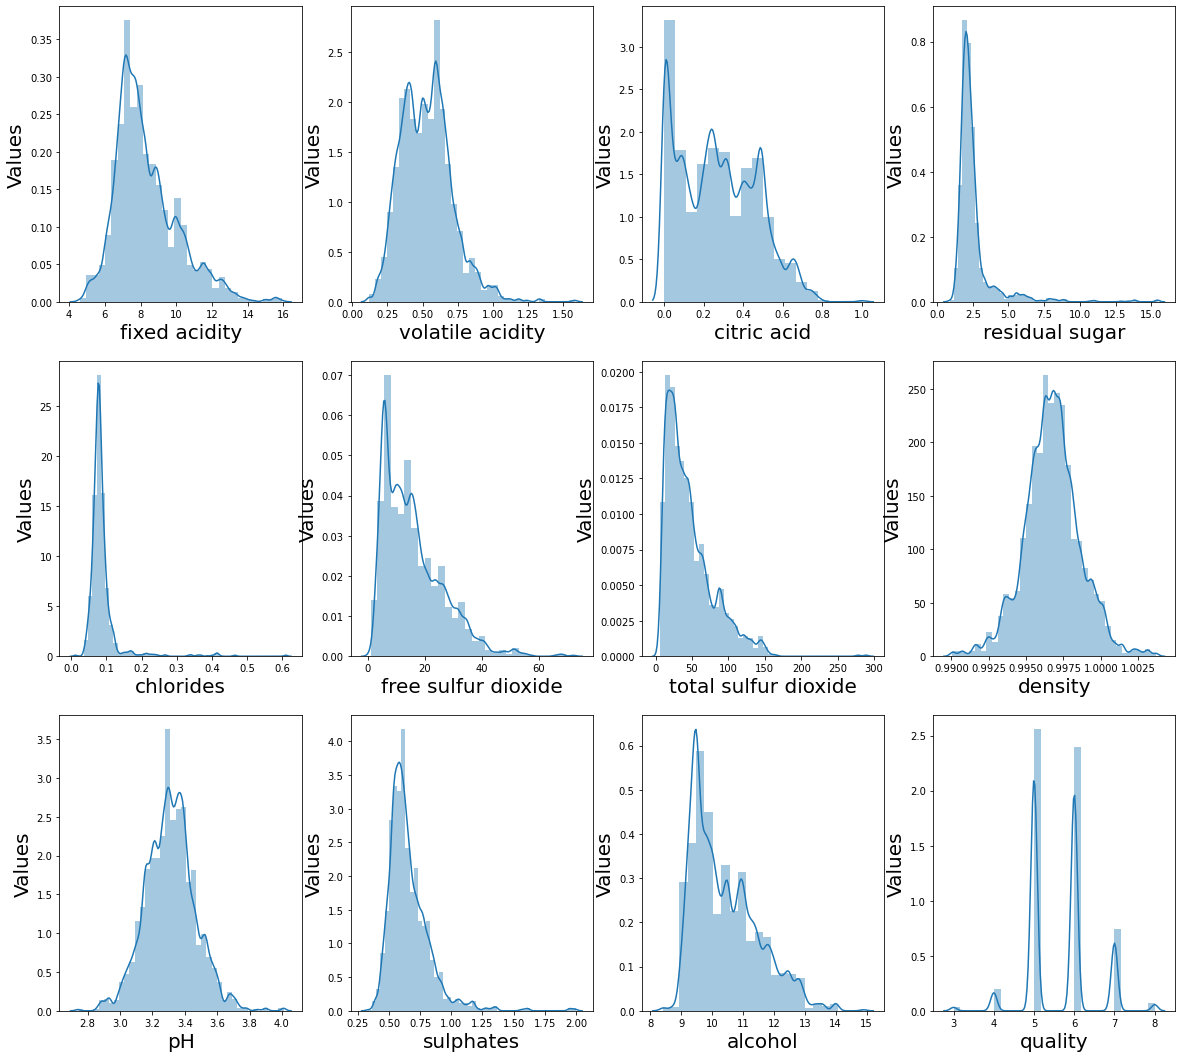

In [32]:
#Dibujamos la distribución de los datos
plt.figure(figsize=(20,25))
plotnumber=1

for column in dataset_Clas:
  if plotnumber<13:
    ax=plt.subplot(4,4,plotnumber)
    #sns.distplot(heart_df[column])
    sns.distplot(dataset_Clas[column], kde_kws={'bw': 0.1})
    plt.xlabel(column,fontsize=20)
    plt.ylabel('Values',fontsize=20)
  plotnumber+=1
plt.show()

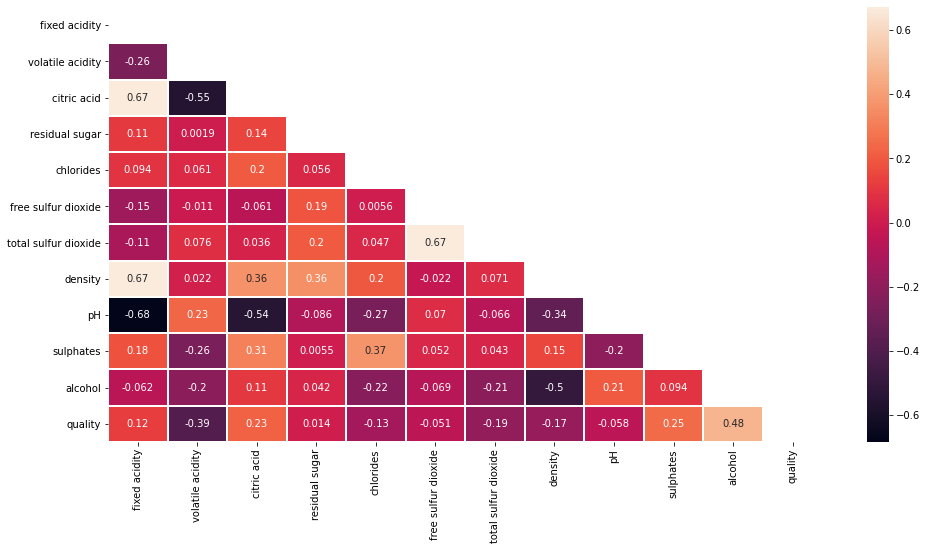

In [33]:
#Matriz de correlación, ver dependencia entre las variables
plt.figure(figsize = (16, 8))

corr = dataset_Clas.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))
sns.heatmap(corr, mask = mask, annot = True, fmt = '.2g', linewidths = 1)
plt.show()

In [34]:
#compruebe la varianza, ve valores desbalanceados a nivel de varianza
dataset_Clas.var()

fixed acidity              3.031416
volatile acidity           0.032062
citric acid                0.037947
residual sugar             1.987897
chlorides                  0.002215
free sulfur dioxide      109.414884
total sulfur dioxide    1082.102373
density                    0.000004
pH                         0.023835
sulphates                  0.028733
alcohol                    1.135647
quality                    0.652168
dtype: float64

In [35]:
#vamos a eliminar la variable free sulfur dioxide viendo su fuerte correlación con Total sulfur dioxide
#siendo que ambas aportan lo mismo al modelo, y viendo que se debe normalizar el valor de las dos
dataset_Clas=dataset_Clas.drop(['free sulfur dioxide'], axis='columns')
#normalizamos el valor de total sulfure diox
dataset_Clas['total sulfur dioxide']=np.log(dataset_Clas['total sulfur dioxide'])
#Comprobamos ahora valores y varianza
dataset_Clas.var()

fixed acidity           3.031416
volatile acidity        0.032062
citric acid             0.037947
residual sugar          1.987897
chlorides               0.002215
total sulfur dioxide    0.497579
density                 0.000004
pH                      0.023835
sulphates               0.028733
alcohol                 1.135647
quality                 0.652168
dtype: float64

In [36]:
#Reemplazamos valores para la Clase por clasificación más clara textualmente
dataset_Clas['quality'] = dataset_Clas['quality'].map({3:'01-Muy Malo',
                            4:'02-Malo',
                            5:'03-Regular',
                            6:'04-Bueno',
                            7:'05-Muy Bueno',
                            8:'06-Excelente',
                            np.nan:'0'})

In [37]:
#Vamos a prepara ahora los datos para entrenar el modelo
#creamos un array de nuestro dataset, por un lado la clase y por otro los atributos convertidos en valores discretos
X = dataset_Clas.drop('quality',axis=1) #recojo en X todos los valores menos la clase
Y = dataset_Clas['quality']#recojo en Y sólo el valor de la clase

In [38]:
#dividimos el dataset 80% para entrenar y 20% para testear
X_train, X_test, Y_train, Y_test = train_test_split(  X, Y, test_size=0.20, random_state=0, shuffle=True)

Accuracy score of the model is:  63.4375 %
** MATRIZ Regresión logística  **


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


<Figure size 1152x576 with 0 Axes>

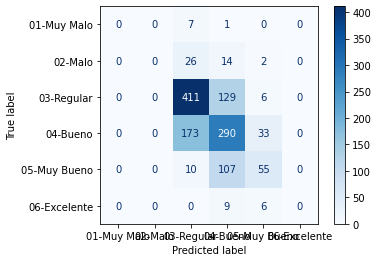

Classification Report               precision    recall  f1-score   support

 01-Muy Malo       0.00      0.00      0.00         2
     02-Malo       0.00      0.00      0.00        11
  03-Regular       0.67      0.75      0.71       135
    04-Bueno       0.63      0.66      0.64       142
05-Muy Bueno       0.42      0.30      0.35        27
06-Excelente       0.00      0.00      0.00         3

    accuracy                           0.63       320
   macro avg       0.29      0.28      0.28       320
weighted avg       0.60      0.63      0.61       320



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [43]:
#1. Modelo. Creamos primer modelo de regresión logística

accuracies={}
lr = LogisticRegression( penalty='l2')
lr.fit(X_train,Y_train)

y_pred1 = lr.predict(X_test)

acc1=accuracy_score(Y_test,y_pred1)
accuracies['Logistic Regression'] = acc1*100
print("Accuracy score of the model is: ", accuracy_score(Y_test,y_pred1)*100,"%")
print('** MATRIZ Regresión logística  **')

disp = plot_confusion_matrix(lr, X_train, Y_train,values_format='.0f', cmap=plt.cm.Blues)
plt.show()
print("Classification Report",classification_report(Y_test,y_pred1))


Accuracy score of the model is: 57.49999999999999 %

** MATRIZ KNeighborsClassifier  **


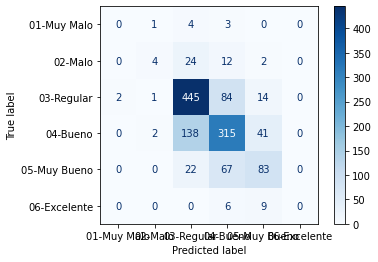

Classification Report               precision    recall  f1-score   support

 01-Muy Malo       0.00      0.00      0.00         2
     02-Malo       0.00      0.00      0.00        11
  03-Regular       0.62      0.73      0.67       135
    04-Bueno       0.58      0.55      0.57       142
05-Muy Bueno       0.28      0.30      0.29        27
06-Excelente       0.00      0.00      0.00         3

    accuracy                           0.57       320
   macro avg       0.25      0.26      0.25       320
weighted avg       0.54      0.57      0.56       320



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [44]:
#2. Modelo. KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=8)

knn.fit(X_train,Y_train)

y_pred2 = knn.predict(X_test)

acc2=accuracy_score(Y_test,y_pred2)
accuracies['KNeighborsClassifier']=acc2*100

accuracy_score(Y_train,knn.predict(X_train))
print('')
print("Accuracy score of the model is:",accuracy_score(Y_test,y_pred2)*100,"%")
print('')
print('** MATRIZ KNeighborsClassifier  **')
disp = plot_confusion_matrix(knn, X_train, Y_train,values_format='.0f', cmap=plt.cm.Blues)
plt.show()
print("Classification Report",classification_report(Y_test,y_pred2))


Accuracy score of the model is: 59.68750000000001 %

** MATRIZ KNeighborsClassifier  **


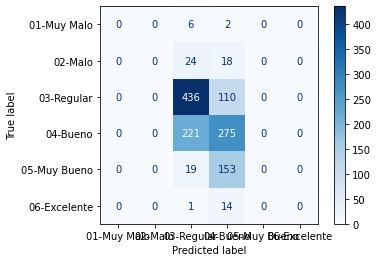

Classification Report               precision    recall  f1-score   support

 01-Muy Malo       0.00      0.00      0.00         2
     02-Malo       0.00      0.00      0.00        11
  03-Regular       0.61      0.80      0.69       135
    04-Bueno       0.58      0.58      0.58       142
05-Muy Bueno       0.00      0.00      0.00        27
06-Excelente       0.00      0.00      0.00         3

    accuracy                           0.60       320
   macro avg       0.20      0.23      0.21       320
weighted avg       0.52      0.60      0.55       320



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [46]:
#Modelo 3. SVC
svc = SVC()
svc.fit(X_train, Y_train)

y_pred3 = svc.predict(X_test)

acc3=accuracy_score(Y_test,y_pred3)
accuracies['SVC']=acc3*100

accuracy_score(Y_train,svc.predict(X_train))
print('')
print("Accuracy score of the model is:",accuracy_score(Y_test,y_pred3)*100,"%")
print('')
print('** MATRIZ KNeighborsClassifier  **')
disp = plot_confusion_matrix(svc, X_train, Y_train,values_format='.0f', cmap=plt.cm.Blues)
plt.show()
print("Classification Report",classification_report(Y_test,y_pred3))

Fitting 10 folds for each of 384 candidates, totalling 3840 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 360 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 2760 tasks      | elapsed:   25.2s
[Parallel(n_jobs=-1)]: Done 3840 out of 3840 | elapsed:   37.2s finished



Accuracy score of the model is: 62.18749999999999 %

** MATRIZ DecisionTree Classifier  **


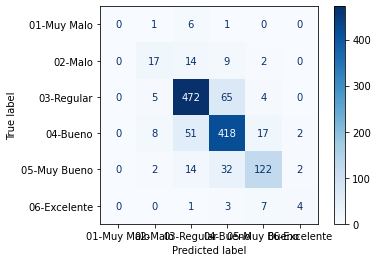

Classification Report               precision    recall  f1-score   support

 01-Muy Malo       0.00      0.00      0.00         2
     02-Malo       0.00      0.00      0.00        11
  03-Regular       0.69      0.73      0.71       135
    04-Bueno       0.63      0.65      0.64       142
05-Muy Bueno       0.32      0.30      0.31        27
06-Excelente       0.00      0.00      0.00         3

    accuracy                           0.62       320
   macro avg       0.27      0.28      0.28       320
weighted avg       0.60      0.62      0.61       320



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [62]:
#Modelo 4 DecisionTree Classifier
#Vamos a tunear los hiperparametros con el GridSeach
grid_params = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [9,11,13],
    'min_samples_split' : range(2, 10, 1),
    'min_samples_leaf' : range(2, 10, 1)
}

grid_search = GridSearchCV(dtc, grid_params, cv = 10, n_jobs = -1, verbose = 1)
grid_search.fit(X_train, Y_train)

dtc = DecisionTreeClassifier(max_depth=grid_search.best_params_['max_depth'], 
                             criterion=grid_search.best_params_['criterion'],
                             min_samples_split=grid_search.best_params_['min_samples_split'],
                             min_samples_leaf=grid_search.best_params_['min_samples_leaf'],
                             random_state=0 )
dtc.fit(X_train, Y_train)

y_pred4 = dtc.predict(X_test)
acc4=accuracy_score(Y_test,y_pred4)
accuracies['DecisionTreeClassifier']=acc4*100

accuracy_score(Y_train,dtc.predict(X_train))
print('')
print("Accuracy score of the model is:",accuracy_score(Y_test,y_pred4)*100,"%")
print('')
print('** MATRIZ DecisionTree Classifier  **')
disp = plot_confusion_matrix(dtc, X_train, Y_train,values_format='.0f', cmap=plt.cm.Blues)
plt.show()
print("Classification Report",classification_report(Y_test,y_pred4))

Fitting 10 folds for each of 36 candidates, totalling 360 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   15.2s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:  2.5min finished


Accuracy score of the model is: 72.8125 %
** MATRIZ  RANDOMDOREST **


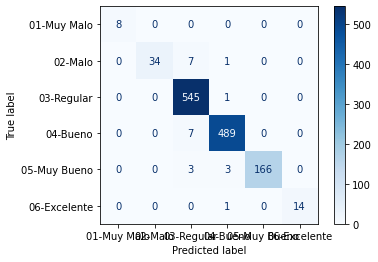

Classification Report               precision    recall  f1-score   support

 01-Muy Malo       0.00      0.00      0.00         2
     02-Malo       0.00      0.00      0.00        11
  03-Regular       0.76      0.84      0.80       135
    04-Bueno       0.74      0.74      0.74       142
05-Muy Bueno       0.50      0.56      0.53        27
06-Excelente       0.00      0.00      0.00         3

    accuracy                           0.73       320
   macro avg       0.33      0.36      0.34       320
weighted avg       0.69      0.73      0.71       320



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [66]:
#5. Modelo. Probamos ahora con un random forest
rfc = RandomForestClassifier(random_state=0 ) #criterion = 'gini', max_depth = 10, max_features = 'sqrt',  random_state=0,
                             #min_samples_leaf = 2, min_samples_split = 4, n_estimators = 180)
#Vamos a tunear los hiperparametros con el GridSeach
grid_params = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [10,11,13],
    'min_samples_split' : range(2,4, 10),
    'min_samples_leaf' : range(2,4, 10),
    'n_estimators': [100,150,200],
    'max_features': ['sqrt', 'log2']
}

grid_search = GridSearchCV(rfc, grid_params, cv = 10, n_jobs = -1, verbose = 1)
grid_search.fit(X_train, Y_train)

rfc = RandomForestClassifier( random_state=0,max_depth=grid_search.best_params_['max_depth'],
                             criterion=grid_search.best_params_['criterion'], min_samples_split=grid_search.best_params_['min_samples_split'],
                             min_samples_leaf=grid_search.best_params_['min_samples_leaf'],
                             n_estimators=grid_search.best_params_['n_estimators'],
                             max_features=grid_search.best_params_['max_features']                         
                            )
rfc.fit(X_train, Y_train)

y_pred5 = rfc.predict(X_test)

acc5=accuracy_score(Y_test,y_pred5)
accuracies['RandomForestClassifier']=acc5*100

accuracy_score(Y_train,rfc.predict(X_train))
print("Accuracy score of the model is:",accuracy_score(Y_test,y_pred5)*100,"%")
print('** MATRIZ  RANDOMDOREST **')
disp = plot_confusion_matrix(rfc, X_train, Y_train,values_format='.0f', cmap=plt.cm.Blues)
plt.show()
print("Classification Report",classification_report(Y_test,y_pred5))


Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:   52.6s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:  2.4min finished


Accuracy score of the model is: 69.6875 %
** MATRIZ GradientBoostingClassifier **


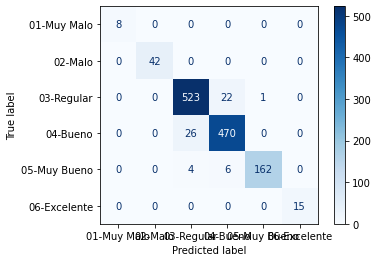

Classification Report               precision    recall  f1-score   support

 01-Muy Malo       0.00      0.00      0.00         2
     02-Malo       0.40      0.18      0.25        11
  03-Regular       0.74      0.83      0.78       135
    04-Bueno       0.73      0.64      0.68       142
05-Muy Bueno       0.47      0.67      0.55        27
06-Excelente       0.00      0.00      0.00         3

    accuracy                           0.70       320
   macro avg       0.39      0.39      0.38       320
weighted avg       0.69      0.70      0.69       320



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [52]:
#6. Modelo. GradientBoostingClassifier
gbc = GradientBoostingClassifier( random_state=0)

parameters = {
    'loss': ['deviance', 'exponential'],
    'learning_rate': [0.001, 0.1, 1, 10],
    'n_estimators': [100, 150, 180, 200]
}

gbc = GridSearchCV(gbc,  parameters, cv = 5, n_jobs = -1, verbose = 1)
gbc.fit(X_train, Y_train)

y_pred6 = gbc.predict(X_test)

acc6=accuracy_score(Y_test,y_pred6)
accuracies['GradientBoosting']=acc5*100
print("Accuracy score of the model is:",accuracy_score(Y_test,y_pred6)*100,"%")
print('** MATRIZ GradientBoostingClassifier **')
disp = plot_confusion_matrix(gbc, X_train, Y_train,values_format='.0f', cmap=plt.cm.Blues)
plt.show()
print("Classification Report",classification_report(Y_test,y_pred6))

Accuracy score of the model is: 53.125 %
** MATRIZ XGBClassifier **


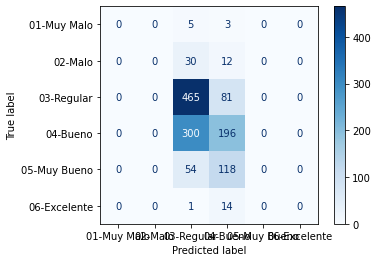

Classification Report               precision    recall  f1-score   support

 01-Muy Malo       0.00      0.00      0.00         2
     02-Malo       0.00      0.00      0.00        11
  03-Regular       0.54      0.83      0.65       135
    04-Bueno       0.52      0.41      0.46       142
05-Muy Bueno       0.00      0.00      0.00        27
06-Excelente       0.00      0.00      0.00         3

    accuracy                           0.53       320
   macro avg       0.18      0.21      0.18       320
weighted avg       0.46      0.53      0.48       320



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [53]:
#7. Modelo XGBClassifier 
xgb = XGBClassifier(booster = 'gblinear', learning_rate = 1, max_depth = 6, n_estimators = 10, random_state=0)
xgb.fit(X_train, Y_train)

y_pred7 = xgb.predict(X_test)

acc7=accuracy_score(Y_test,y_pred7)
accuracies['XGBClassifier']=acc7*100
print("Accuracy score of the model is:",accuracy_score(Y_test,y_pred7)*100,"%")

print('** MATRIZ XGBClassifier **')
disp = plot_confusion_matrix(xgb, X_train, Y_train,values_format='.0f', cmap=plt.cm.Blues)
plt.show()
print("Classification Report",classification_report(Y_test,y_pred7))

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Accuracy score of the model is: 60.62499999999999 %
** MATRIZ Red neuronal **


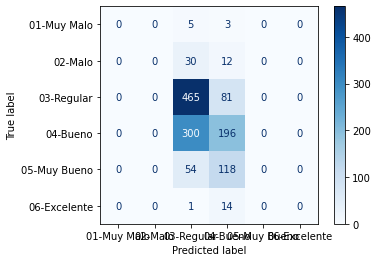

Classification Report               precision    recall  f1-score   support

 01-Muy Malo       0.00      0.00      0.00         2
     02-Malo       0.00      0.00      0.00        11
  03-Regular       0.54      0.83      0.65       135
    04-Bueno       0.52      0.41      0.46       142
05-Muy Bueno       0.00      0.00      0.00        27
06-Excelente       0.00      0.00      0.00         3

    accuracy                           0.53       320
   macro avg       0.18      0.21      0.18       320
weighted avg       0.46      0.53      0.48       320



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [59]:
#8. Modelo. Red Neuronal
mlp=MLPClassifier(  activation="logistic", alpha=1e-05, batch_size="auto",beta_1=0.9, 
                  beta_2=0.999, early_stopping=False, epsilon=1e-08, hidden_layer_sizes=(3,3),
                  learning_rate="constant", learning_rate_init=0.001, max_iter=200, momentum=0.9, 
                  nesterovs_momentum=True, power_t=0.5, random_state=0, shuffle=True, 
                  solver="lbfgs", tol=0.0001, validation_fraction=0.1, verbose=False, warm_start=False)
mlp.fit(X_train, Y_train)
y_pred8 = mlp.predict(X_test)

acc8=accuracy_score(Y_test,y_pred8)
accuracies['Red neuronal']=acc8*100
print("Accuracy score of the model is:",accuracy_score(Y_test,y_pred8)*100,"%")

print('** MATRIZ Red neuronal **')
disp = plot_confusion_matrix(xgb, X_train, Y_train,values_format='.0f', cmap=plt.cm.Blues)
plt.show()
print("Classification Report",classification_report(Y_test,y_pred7))

In [68]:
#Cargamos los algoritmos en un array de modelos para comparar
modelos=[] #inicializamos el objeto modelos
modelos.append(('1. Regresion Log', lr))
modelos.append( ('2. KNN', knn))
modelos.append( ('3. SVC', svc))
modelos.append( ('4. Tree', dtc))
modelos.append( ('5. RF', rfc))
modelos.append( ('6. Gradient Boosting', gbc))
modelos.append( ('7. XGB Classifier', xgb))
modelos.append(("8. MLP", mlp))

#Evaluamos cada modelo con un proceso de validación cruzada de 10 iteraciones.
#Comparamos el Accuracy medio de las validaciones y la desviación estándar. 
resultados=[]
names=[]
for name, model in modelos:
  kfold=StratifiedKFold(n_splits=10)
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
  resultados.append(cv_results)
  names.append(name)
#AVISO:  HAY COMO 30' DE EJECUCIÓN SI QUEREMOS VER TODOS LOS MODELOS


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown

Fitting 5 folds for each of 32 candidates, totalling 160 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:   49.3s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:  2.2min finished


Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:   48.3s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:  2.2min finished


Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:   48.6s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:  2.2min finished


Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:   48.0s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:  2.2min finished


Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:   48.2s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:  2.1min finished


Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:   48.5s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:  2.2min finished


Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:   48.1s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:  2.1min finished


Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:   48.4s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:  2.2min finished


Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:   48.1s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:  2.1min finished


Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:   48.6s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:  2.2min finished
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_

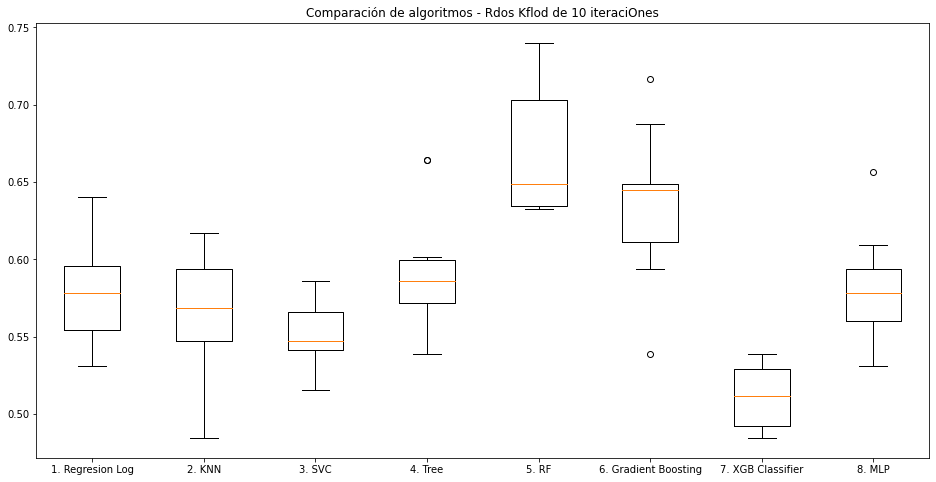

RLog: 0.578125
KNN: 0.5686208169291338
SVC: 0.546875
Tree: 0.5859375
RF: 0.6484375
GBoosting: 0.64453125
XGB Class: 0.51171875
Red Neuronal: 0.578125


In [71]:
#Gráfica Comparación de algoritmos según el resultado de la validación cruzada del paso anterior
plt.figure(figsize = (16, 8))
pyplot.boxplot(resultados, labels=names)
pyplot.title('Comparación de algoritmos - Rdos Kflod de 10 iteraciOnes')
pyplot.show()
print('RLog:' , np.percentile(resultados[0],50))
print('KNN:' , np.percentile(resultados[1],50))
print('SVC:' , np.percentile(resultados[2],50))
print('Tree:' , np.percentile(resultados[3],50))
print('RF:' , np.percentile(resultados[4],50))
print('GBoosting:' , np.percentile(resultados[5],50))
print('XGB Class:' , np.percentile(resultados[6],50))
print('Red Neuronal:' , np.percentile(resultados[7],50))


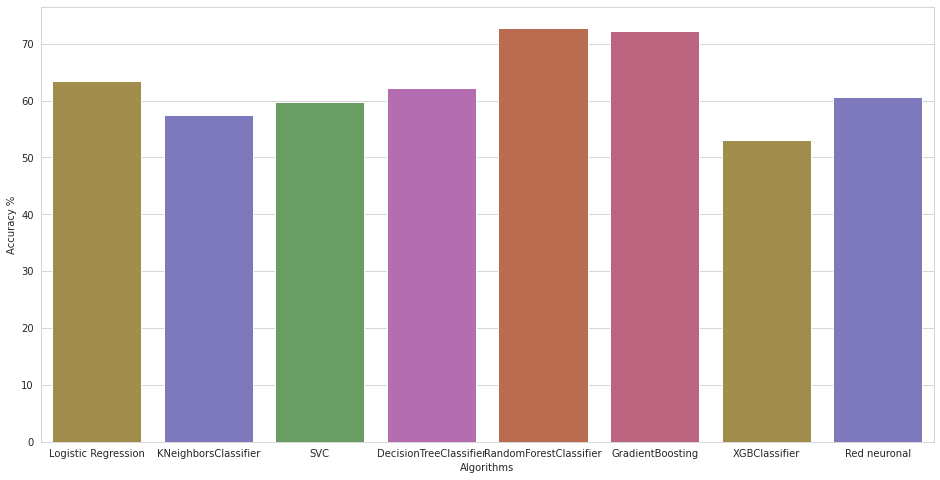

In [72]:
colors = ["#b0963e", "#746cc9", "#60a75b", "#bf61bb","#cc633f","#c8567a"]

sns.set_style("whitegrid")
plt.figure(figsize=(16,8))
plt.yticks(np.arange(0,1200,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot( x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors )
plt.show()

### **EJERCICIO 1 - REGRESIÓN**

Exploración descriptiva de los datos previa a la generación de los modelos. 

Este paso preliminar nos permitirá entener la información disponible en el conjunto de datos, qué son y de qué tipo; comprender qué contiene cada variable, identificar la clase y detectar errores. 


In [68]:
#Analizamos con un head & tail los nombres de las columnas y una muestra de valores de nuestro dataset 
#del principio y del final de los registros
print(dataset.head())
print (dataset.tail())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
      age     sex    bmi  children smoker     region     charges
1333   50    male  30.97         3     no  northwest  10600.5483
1334   18  female  31.92         0     no  northeast   2205.9808
1335   18  female  36.85         0     no  southeast   1629.8335
1336   21  female  25.80         0     no  southwest   2007.9450
1337   61  female  29.07         0    yes  northwest  29141.3603


In [6]:
#Comprobamos el tipo de datos contenido en cada atributo del dataset, numero de obs y valores nulos 
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [69]:
#Renombro las columnas para ganar en contextualización
dataset.columns = ["edad", "sexo", "bmi", "hijos",
                 "fumador", "region", "precio", 
                 ]

In [70]:
#Verificacmos valores nulos
dataset.isna().sum().sort_values()

edad       0
sexo       0
bmi        0
hijos      0
fumador    0
region     0
precio     0
dtype: int64

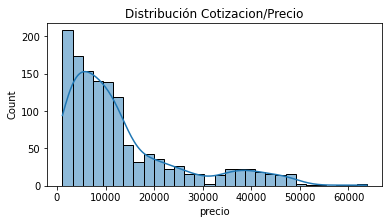

In [71]:
# Distribución variable a predecir
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 3))
sns.histplot(data=dataset, x='precio', kde=True,ax=ax)
ax.set_title("Distribución Cotizacion/Precio")
ax.set_xlabel('precio');

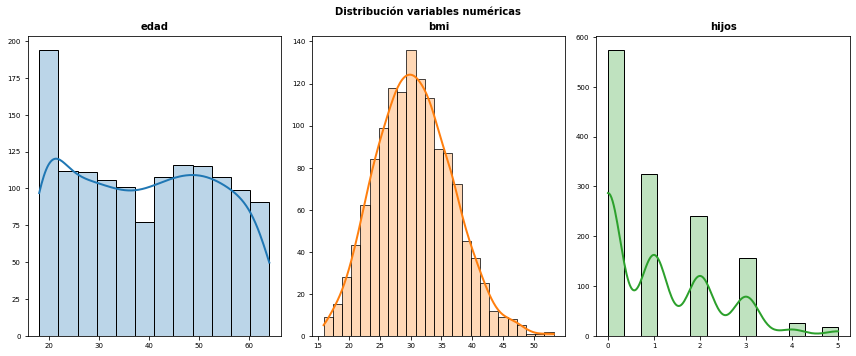

In [72]:
# Gráfico de distribución de variables numérica

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 5))
axes = axes.flat
columnas_numeric = dataset.select_dtypes(include=['float64', 'int']).columns
columnas_numeric = columnas_numeric.drop('precio')

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data    = dataset,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 7)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
    
    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas', fontsize = 10, fontweight = "bold");

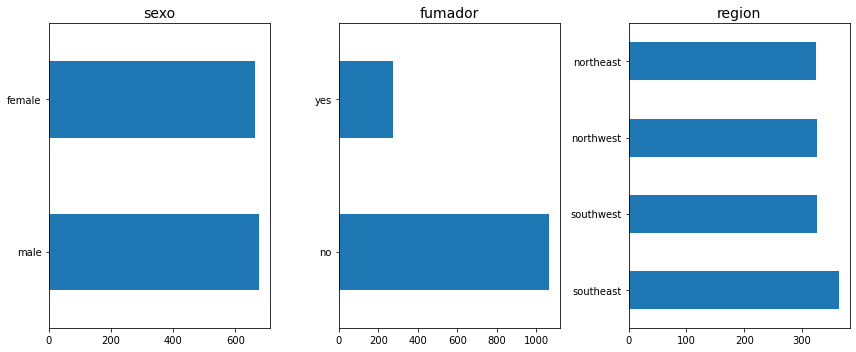

In [73]:
# Gráfico para variables cualitativas
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 5))
axes = axes.flat
columnas_object = dataset.select_dtypes(include=['object']).columns

for i, colum in enumerate(columnas_object):
    dataset[colum].value_counts().plot.barh(ax = axes[i])
    axes[i].set_title(colum, fontsize = 14)
    axes[i].set_xlabel("")
  
fig.tight_layout()

In [77]:
#Ajusto los valores del número de hijos
dic_replace = {3: 3,
               4: 3,
               5: 3}

dataset['hijos'] = dataset['hijos'] \
                     .map(dic_replace) \
                     .fillna(dataset['hijos'])

#Transformo las variables cualitativas en variables numéricas
dataset['sexo'] = dataset['sexo'].map({'female':0, 'male':1,})
dataset['sexo'] =dataset['sexo'].astype('int')
dataset['fumador'] = dataset['fumador'].map({'no':0,
                            'yes':1,})
dataset['fumador'] =dataset['fumador'].astype('int')
dataset['region'] = dataset['region'].map({'northeast':0,
                            'northwest':1,
                            'southwest':2,
                            'southeast':1,})
dataset['region'] =dataset['region'].astype('int')

In [78]:
dataset.describe()

,edad,sexo,bmi,hijos,fumador,region,precio
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.049327,0.204783,1.000747,13270.422265
std,14.049960,0.500160,6.098187,1.097609,0.403694,0.696717,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,1.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,1.000000,16639.912515
max,64.000000,1.000000,53.130000,3.000000,1.000000,2.000000,63770.428010


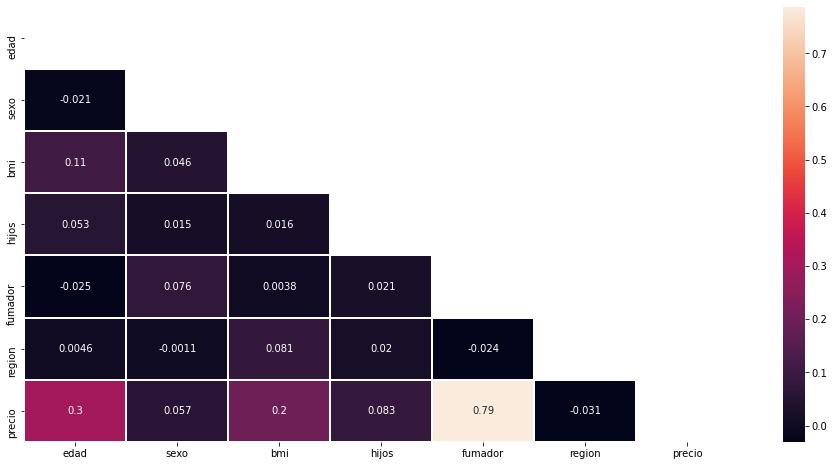

In [79]:
#Matriz de correlación, ver dependencia entre las variables
plt.figure(figsize = (16, 8))

corr = dataset.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))
sns.heatmap(corr, mask = mask, annot = True, fmt = '.2g', linewidths = 1)
plt.show()

In [80]:
dataset.var()

edad       1.974014e+02
sexo       2.501596e-01
bmi        3.718788e+01
hijos      1.204745e+00
fumador    1.629689e-01
region     4.854145e-01
precio     1.466524e+08
dtype: float64

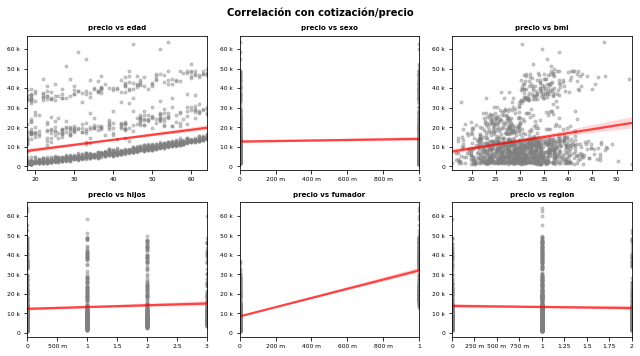

In [81]:
# Gráfico de distribución para cada variable numérica
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(9, 5))
axes = axes.flat
columnas_numeric = dataset.select_dtypes(include=['float64', 'int']).columns
columnas_numeric = columnas_numeric.drop('precio')

for i, colum in enumerate(columnas_numeric):
    sns.regplot(
        x           = dataset[colum],
        y           = dataset['precio'],
        color       = "gray",
        marker      = '.',
        scatter_kws = {"alpha":0.4},
        line_kws    = {"color":"r","alpha":0.7},
        ax          = axes[i]
    )
    axes[i].set_title(f"precio vs {colum}", fontsize = 7, fontweight = "bold")
    #axes[i].ticklabel_format(style='sci', scilimits=(-4,4), axis='both')
    axes[i].yaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].xaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Correlación con cotización/precio', fontsize = 10, fontweight = "bold");

In [87]:
dataset.head()


,edad,sexo,bmi,hijos,fumador,region,precio
0,19,0,27.900,0.0,1,2,16884.92400
1,18,1,33.770,1.0,0,1,1725.55230
2,28,1,33.000,3.0,0,1,4449.46200
3,33,1,22.705,0.0,0,1,21984.47061
4,32,1,28.880,0.0,0,1,3866.85520


### **PASO 2 - TRATAMIENTO Y PREPROCESADO**

Los modelos de redes neuronales requieren de dos tipos de preprocesado: binarización (One hot ecoding) para variables categóricas y estandarización para variables continuas.

In [86]:
#Creamos nuestro conjunto de datos de entrenamiento y datos de test
X_train, X_test, Y_train, Y_test = train_test_split(
                                        dataset.drop('precio', axis = 'columns'),
                                        dataset['precio'],
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

print("Partición de entrenamento")
print("-----------------------")
print(Y_train.describe())

print("Partición de test")
print("-----------------------")
print(Y_test.describe())


Partición de entrenamento
-----------------------
count     1070.000000
mean     13302.284296
std      12137.030178
min       1131.506600
25%       4806.138175
50%       9369.615750
75%      16454.504562
max      63770.428010
Name: precio, dtype: float64
Partición de test
-----------------------
count      268.000000
mean     13143.211917
std      12023.242046
min       1121.873900
25%       4520.472025
50%       9398.583150
75%      17300.427550
max      48824.450000
Name: precio, dtype: float64


In [29]:
# Se estandarizan las columnas numéricas y se hace one-hot-encoding de las 
# columnas cualitativas. Para mantener las columnas a las que no se les aplica 
# ninguna transformación se tiene que indicar remainder='passthrough'.
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Identificación de columnas numéricas y categóricas
dataset=dataset.drop(['charges'],axis='columns')
numeric_cols = dataset.select_dtypes(include=['float64', 'int']).columns.to_list()
cat_cols = dataset.select_dtypes(include=['object', 'category']).columns.to_list()


# Transformaciones para las variables numéricas
numeric_transformer = Pipeline(
                        steps=[('scaler', StandardScaler( ))]
                      )

# Transformaciones para las variables categóricas
categorical_transformer = Pipeline(
                            steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))]
                          )

preprocessor = ColumnTransformer(
                    transformers=[
                        ('numeric', numeric_transformer, numeric_cols),
                        ('cat', categorical_transformer, cat_cols)
                    ],
                    remainder='passthrough'
                )

NameError: ignored

In [ ]:
#Comprobamos el contenido del nuevo dataset
dataset.head(4)

,Buying,Maintenance,Doors,Person,lug_boot,safety,class
0,4,4,2,2,1,1,1.No Aceptable
1,4,4,2,2,1,2,1.No Aceptable
2,4,4,2,2,1,3,1.No Aceptable
3,4,4,2,2,2,1,1.No Aceptable


### **PTE PASO 4 - COMPARATIVA ENTRE MODELOS**

" Árbol Decisión VS Random Forest "

Procedemos a analizar los principales parámetros que indican la eficacia del modelo para la predicción que se pretende





> Creamos un array de datos con nuestro modelos construidos



In [ ]:
#Cargamos los algoritmos en un array de modelos para comparar
modelos=[] #inicializamos el objeto modelos
modelos.append(('CART', treeCart))
modelos.append( ('RF', rf))



> Aplicaremos una Validación Cruzada kflod de 10 iteraciones
Con esto haremos 10 grupos aleatorios de train-test y almacenaremos los resultados de nuestros modelos para estas combinaciones



In [ ]:
#Evaluamos cada modelo con un proceso de validación cruzada de 10 iteraciones.
#Comparamos el Accuracy medio de las validaciones y la desviación estándar. 
resultados=[]
names=[]
for name, model in modelos:
  kfold=StratifiedKFold(n_splits=10)
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
  resultados.append(cv_results)
  names.append(name)



> Mostramos un gráfico de Cajas y Bigotes para analizar los resultados de la validación cruzada y comparar resultados



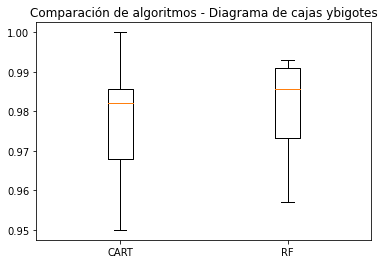

Mediana CART: 0.9821428571428572
Mediana RF: 0.9857142857142858


In [ ]:
#Gráfica Comparación de algoritmos según el resultado de la validación cruzada del paso anterior
pyplot.boxplot(resultados, labels=names)
pyplot.title('Comparación de algoritmos - Diagrama de cajas ybigotes')
pyplot.show()
print('Mediana CART:' , np.percentile(resultados[0],50))
print('Mediana RF:' , np.percentile(resultados[1],50))

** MATRIZ ÁRBOL CART **


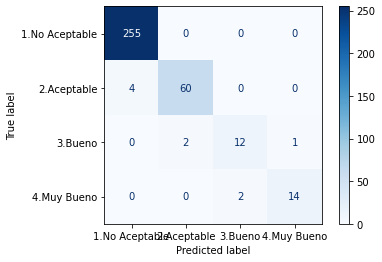

** MATRIZ RANDOM FOREST **


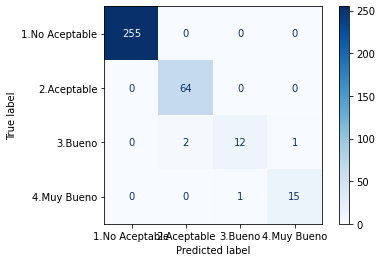

In [ ]:
print('** MATRIZ ÁRBOL CART **')
disp = plot_confusion_matrix(treeCart, X_validation, Y_validation, values_format='.0f',  cmap=plt.cm.Blues)
plt.show()
print('** MATRIZ RANDOM FOREST **')
disp = plot_confusion_matrix(rf, X_validation, Y_validation,values_format='.0f', cmap=plt.cm.Blues)
plt.show()

In [ ]:
#Calculamos tasas y ratios

#TREE
FP = tree_mdc.sum(axis=0) - np.diag(tree_mdc) 
FN = tree_mdc.sum(axis=1) - np.diag(tree_mdc)
TP = np.diag(tree_mdc)
TN = tree_mdc.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)
# Accuracy x Clase
tree_ACC = (TP+TN)/(TP+FP+FN+TN)
# Sensitivity, recall, o TPR
tree_TPR = TP/(TP+FN)
# Specificity or TNR
tree_TNR = TN/(TN+FP) 
# FPR
tree_FPR = FP/(FP+TN)

#RF
FP = rf_mdc.sum(axis=0) - np.diag(rf_mdc) 
FN = rf_mdc.sum(axis=1) - np.diag(rf_mdc)
TP = np.diag(rf_mdc)
TN = rf_mdc.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)
# Accuracy x Clase
rf_ACC = (TP+TN)/(TP+FP+FN+TN)
# Sensitivity, recall, o TPR
rf_TPR = TP/(TP+FN)
# Specificity or TNR
rf_TNR = TN/(TN+FP) 
# FPR
rf_FPR = FP/(FP+TN)




> Construimos una tabla con los ratios del ARBOL CART.
**texto en negrita**
Accuracy, Tasa de error, True Positive Rate, False Positive Rate



In [ ]:
print('TASAS CART')
tree_tasas=ps.DataFrame( tree_ACC, columns=['ACC'])
tree_tasas['Te']=1-tree_tasas['ACC']
tree_tasas['TPR']=tree_TPR
tree_tasas['FPR']=tree_FPR
tree_tasas['Class']=['01-Inaceptable', '02-Aceptable', '03-Bueno', '04-Muy Bueno']
tree_tasas



TASAS CART


,ACC,Te,TPR,FPR,Class
0,0.988571,0.011429,1.0000,0.042105,01-Inaceptable
1,0.982857,0.017143,0.9375,0.006993,02-Aceptable
2,0.985714,0.014286,0.8000,0.005970,03-Bueno
3,0.991429,0.008571,0.8750,0.002994,04-Muy Bueno


In [ ]:
print('\n')
print('TASAS RF')

rf_tasas=ps.DataFrame( rf_ACC, columns=['ACC'])
rf_tasas['Te']=1-rf_tasas['ACC']
rf_tasas['TPR']=rf_TPR
rf_tasas['FPR']=rf_FPR
rf_tasas['Class']=['01-Inaceptable', '02-Aceptable', '03-Bueno', '04-Muy Bueno']
rf_tasas




TASAS RF


,ACC,Te,TPR,FPR,Class
0,1.000000,0.000000,1.0000,0.000000,01-Inaceptable
1,0.994286,0.005714,1.0000,0.006993,02-Aceptable
2,0.988571,0.011429,0.8000,0.002985,03-Bueno
3,0.994286,0.005714,0.9375,0.002994,04-Muy Bueno


In [ ]:
#Analizamos los resultados
#Accuracy | Tasa error | Sensibilidad | Especificidad | Matriz Confusión | Informe de clasificación

itotales=tree_mdc.sum()
icorrectas=tree_mdc[0,0] +tree_mdc[1,1]+tree_mdc[2,2]+tree_mdc[3,3]
print('Instancias correctas: ' + str(icorrectas ))
print('Instancias erróneas: '+ str(itotales - icorrectas))

itotales=rf_mdc.sum()
icorrectas=rf_mdc[0,0] +rf_mdc[1,1]+rf_mdc[2,2]+rf_mdc[3,3]
print('Instancias correctas: ' + str(icorrectas ))
print('Instancias erróneas: '+ str(itotales - icorrectas))

print('\n')
print('* CART Global Accuracy: ',accuracy_score(Y_validation, tree_pred))
print('* RF Global Accuracy: ',accuracy_score(Y_validation, rf_pred))

print('\n')
print('* CART Global Tasa Error: ',1-accuracy_score(Y_validation, tree_pred))
print('* RF Global Tasa Error: ',1-accuracy_score(Y_validation, rf_pred))


print('\n')
print('\n')
print('* CART Informe de Clasificación :')
print(classification_report(Y_validation, tree_pred))
print('\n')
print('* RF Informe de Clasificación :')
print(classification_report(Y_validation, rf_pred))


Instancias correctas: 341
Instancias erróneas: 9
Instancias correctas: 346
Instancias erróneas: 4


* CART Global Accuracy:  0.9742857142857143
* RF Global Accuracy:  0.9885714285714285


* CART Global Tasa Error:  0.02571428571428569
* RF Global Tasa Error:  0.011428571428571455




* CART Informe de Clasificación :
                precision    recall  f1-score   support

1.No Aceptable       0.98      1.00      0.99       255
   2.Aceptable       0.97      0.94      0.95        64
       3.Bueno       0.86      0.80      0.83        15
   4.Muy Bueno       0.93      0.88      0.90        16

      accuracy                           0.97       350
     macro avg       0.94      0.90      0.92       350
  weighted avg       0.97      0.97      0.97       350



* RF Informe de Clasificación :
                precision    recall  f1-score   support

1.No Aceptable       1.00      1.00      1.00       255
   2.Aceptable       0.97      1.00      0.98        64
       3.Bueno       0.92  